In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df_train = pd.read_csv("train (2).csv", header=0)
df_test = pd.read_csv("test.csv", header=0)

In [4]:
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [5]:
df_test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [6]:
df_train.shape

(45593, 20)

In [7]:
df_test.shape

(11399, 19)

In [8]:
df_train.size

911860

In [9]:
df_test.size

216581

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          11399 non-null  object 
 3   Delivery_person_Ratings      11399 non-null  object 
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  11399 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weatherconditions            11399 non-null  object 
 12  Road_traffic_density         11399 non-null  object 
 13  Vehicle_conditio

In [12]:
df_train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [13]:
df_test.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,11399.000000,11399.000000,11399.000000,11399.000000,11399.000000
mean,17.099934,70.399259,17.569497,71.102187,1.031406
std,8.193510,22.773144,7.287440,20.693782,0.839599
min,-30.902872,-88.400467,0.010000,0.010000,0.000000
25%,12.933284,73.170937,12.992532,73.771081,0.000000
50%,18.551440,75.897429,18.643481,75.996959,1.000000
75%,22.732225,78.045732,22.791226,78.109004,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [14]:
df_train.isnull().values.any()

False

In [15]:
df_test.isnull().values.any()

False

In [16]:
df_train.count()

ID                             45593
Delivery_person_ID             45593
Delivery_person_Age            45593
Delivery_person_Ratings        45593
Restaurant_latitude            45593
Restaurant_longitude           45593
Delivery_location_latitude     45593
Delivery_location_longitude    45593
Order_Date                     45593
Time_Orderd                    45593
Time_Order_picked              45593
Weatherconditions              45593
Road_traffic_density           45593
Vehicle_condition              45593
Type_of_order                  45593
Type_of_vehicle                45593
multiple_deliveries            45593
Festival                       45593
City                           45593
Time_taken(min)                45593
dtype: int64

In [17]:
df_test.count()

ID                             11399
Delivery_person_ID             11399
Delivery_person_Age            11399
Delivery_person_Ratings        11399
Restaurant_latitude            11399
Restaurant_longitude           11399
Delivery_location_latitude     11399
Delivery_location_longitude    11399
Order_Date                     11399
Time_Orderd                    11399
Time_Order_picked              11399
Weatherconditions              11399
Road_traffic_density           11399
Vehicle_condition              11399
Type_of_order                  11399
Type_of_vehicle                11399
multiple_deliveries            11399
Festival                       11399
City                           11399
dtype: int64

In [18]:
df_combine = pd.concat([df_train,df_test],axis=0)

In [19]:
df_combine.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [20]:
df_combine.shape

(56992, 20)

In [21]:
df_combine.size

1139840

In [22]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56992 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          56992 non-null  object 
 3   Delivery_person_Ratings      56992 non-null  object 
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  56992 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weatherconditions            56992 non-null  object 
 12  Road_traffic_density         56992 non-null  object 
 13  Vehicle_condition    

In [24]:
df_combine.drop(labels = ["Festival","multiple_deliveries","Road_traffic_density","Weatherconditions","Time_Order_picked"], inplace= True, axis=1)

In [25]:
df_combine.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Vehicle_condition,Type_of_order,Type_of_vehicle,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,2,Snack,motorcycle,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,2,Snack,scooter,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,0,Drinks,motorcycle,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,0,Buffet,motorcycle,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,1,Snack,scooter,Metropolitian,(min) 30


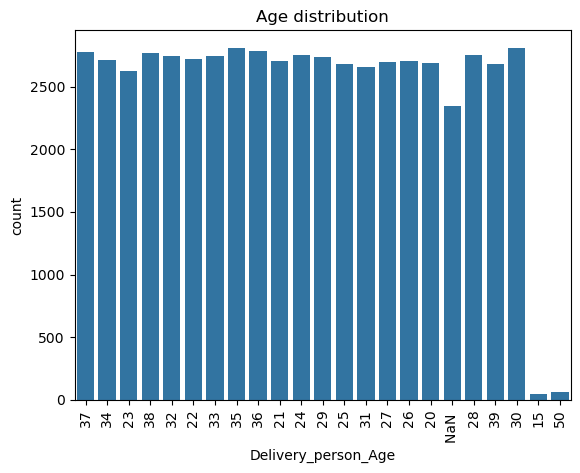

In [26]:
sns.countplot(x="Delivery_person_Age", data=df_combine)
plt.xticks(rotation=90)
plt.title("Age distribution")
plt.show()

In [27]:
encoder = LabelEncoder()
new_col = encoder.fit_transform(df_combine["Delivery_person_Age"].values)
df_combine["Delivery_person_Age_new"] = new_col
df_combine.drop(labels = ["Delivery_person_Age"], axis = 1, inplace = True)

In [28]:
encoder = LabelEncoder()
new_col1 = encoder.fit_transform(df_combine["Delivery_person_Ratings"].values)
df_combine["Delivery_person_Ratings_new"] = new_col1
df_combine.drop(labels = ["Delivery_person_Ratings"], axis = 1, inplace = True)

In [29]:
df_combine = pd.get_dummies(df_combine)

In [30]:
df_combine.head()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Delivery_person_Age_new,Delivery_person_Ratings_new,ID_0x1000,ID_0x1001,ID_0x1002,...,Time_taken(min)_(min) 45,Time_taken(min)_(min) 46,Time_taken(min)_(min) 47,Time_taken(min)_(min) 48,Time_taken(min)_(min) 49,Time_taken(min)_(min) 50,Time_taken(min)_(min) 51,Time_taken(min)_(min) 52,Time_taken(min)_(min) 53,Time_taken(min)_(min) 54
0,22.745049,75.892471,22.765049,75.912471,2,18,25,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12.913041,77.683237,13.043041,77.813237,2,15,21,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12.914264,77.678400,12.924264,77.688400,0,4,20,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11.003669,76.976494,11.053669,77.026494,0,19,23,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12.972793,80.249982,13.012793,80.289982,1,13,22,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
X = df_combine.drop("Delivery_person_Age_new", axis=True)
y = df_combine["Delivery_person_Age_new"]

In [32]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.3, random_state = 42)

LINEAR REGRESSION